In [1]:
# Read dataset
from sklearn.datasets import load_wine
import pandas as pd

# load wine dataset from sklearn
wine = load_wine()

# convert to pandas DataFrame
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [2]:
# EDA
print(f'5 data teratas:\n',df.head())
print(f'\nCek Missing Values:\n',df.isnull().sum())

5 data teratas:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

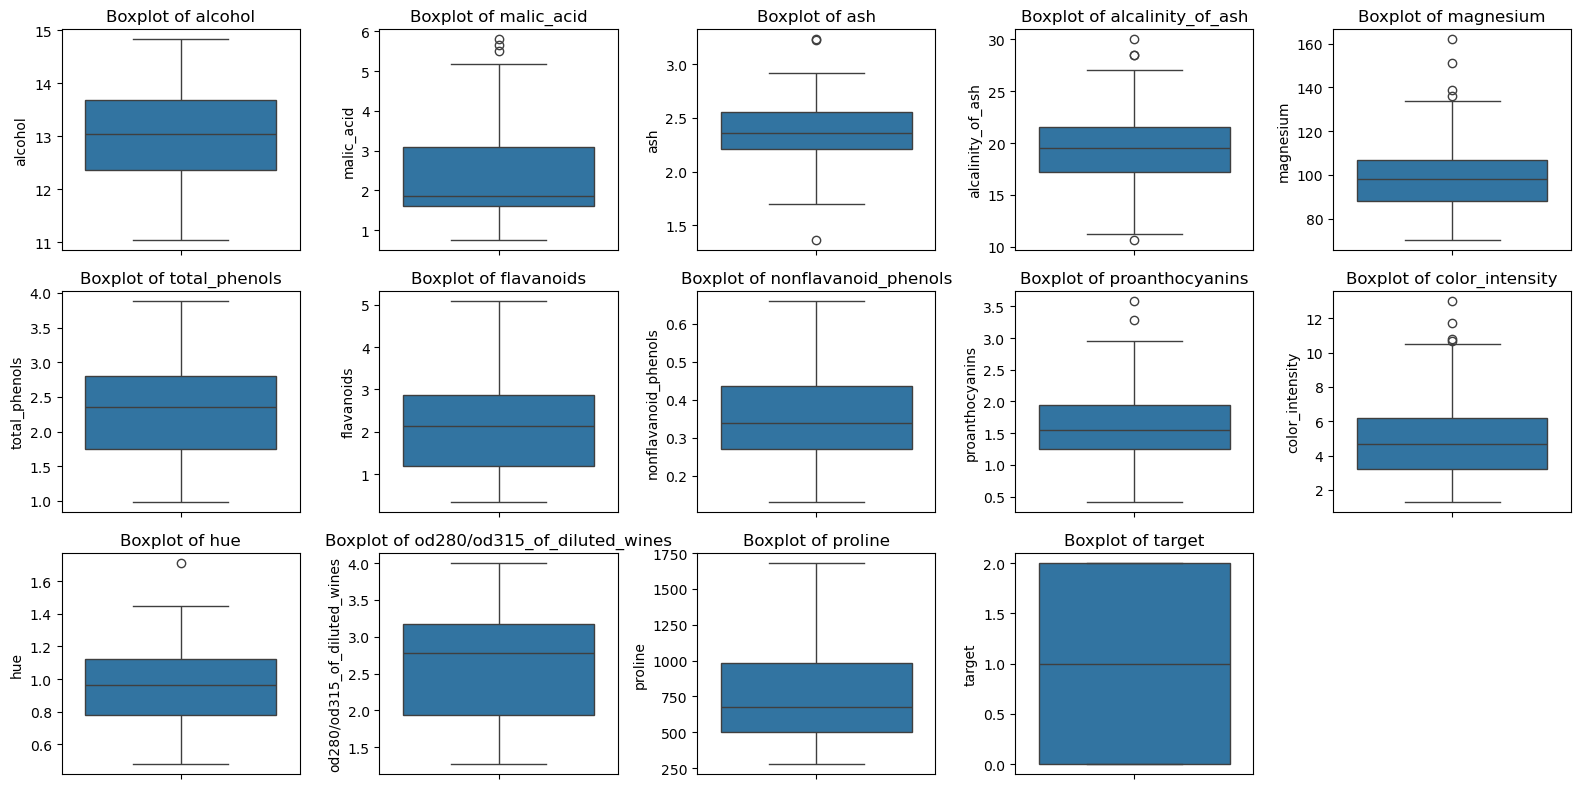

In [3]:
# Cek Outlier
import seaborn as sns 
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot for each feature in the dataframe
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [4]:
# Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# pisahkan X dan Y
X = df.drop(columns=['target'])
y = df['target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [5]:
# Import required libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load and prepare your data (assuming X and y are your features and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

# Create and configure XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.05,
    colsample_bytree=0.05,
    gamma=0.05,
    reg_alpha=0.05,
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (optional)
feature_importance = xgb_classifier.feature_importances_
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.83      0.71      0.77        14
           2       1.00      0.70      0.82        10

    accuracy                           0.81        36
   macro avg       0.85      0.80      0.81        36
weighted avg       0.84      0.81      0.80        36


Feature Importance:
Feature 1: 0.1017
Feature 2: 0.0693
Feature 3: 0.0552
Feature 4: 0.0598
Feature 5: 0.0775
Feature 6: 0.0738
Feature 7: 0.1295
Feature 8: 0.0683
Feature 9: 0.0648
Feature 10: 0.0569
Feature 11: 0.0651
Feature 12: 0.0721
Feature 13: 0.1061


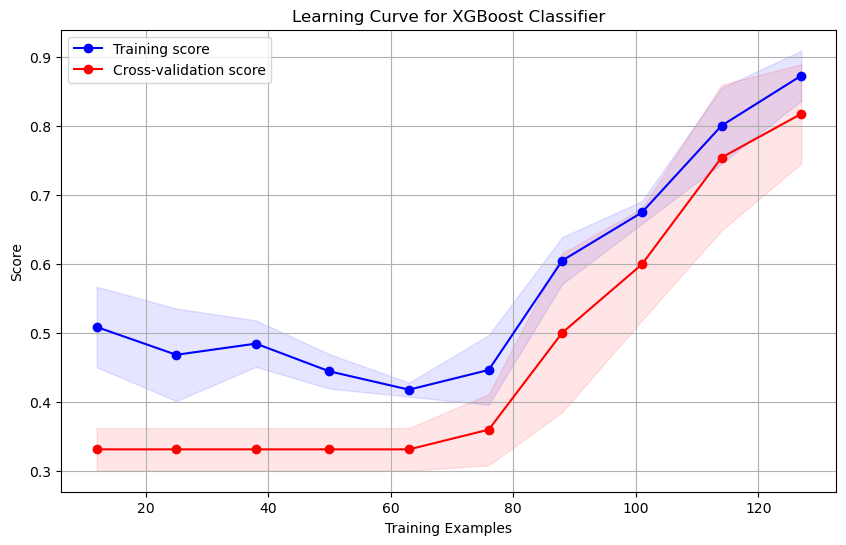

In [6]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_classifier,  # Your trained XGBoost classifier
    X_train_scaled, 
    y_train,
    cv=10,  # 10-fold cross validation
    n_jobs=-1,  # Use all CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10)  # 10 different training set sizes
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red', marker='o')

# Add standard deviation bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for XGBoost Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()
